# <center>Machine Learning Project</center>

Description of the project

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing Notebook*</center>

** **

**Description of the notebook**


Overview of the dataset: summary statistics, data types and missing values

EDA: univariate analysis, multivariate analysis, class distributions

Visualizations: heatmaps, histograms, box plots

Incoherencies

Insides and potential issues

Handling missing values

Encoding categorical variables

Feature Engineering

Feature scaling

Feature Selection


The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943

# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)

    1.1 [Data Types](#1.1-Data-Types)
    
    1.2 [Check Duplicates](#1.2-Check-Duplicates)<br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Incoherencies](#2.3-Incoherencies)

    2.4 [Feature Engineering](#2.4-Geature-Engineering)
    
    2.5 [Outliers](#2.5-Outliers)
    
    2.6 [Visualisations](#2.6-Visualisations) <br><br>


3. [Data Encoding](#3.-Data-Encoding)

# 1. Importing Libraries & Data

In [39]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from utils import *

In [4]:
# Import dataset
df = pd.read_csv('./project_data/train_data.csv')
df

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_11908\1134853745.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 Data Types

After loading the dataset, an important step is to check the data types of the variables.

In [37]:
df.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                float64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                   float64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                  float64
Industry Code                                 

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type*

In [ ]:
# Select date columns
date_cols = df.columns[df.columns.str.contains('Date')]
# Transform into date using pandas
df[date_cols] = df[date_cols].apply(pd.to_datetime)

Above, the dates are changed to the correct data type.

*Change code columns to strings*

In [41]:
# Select code columns
code_cols = df.columns[df.columns.str.contains('Code')]
# Transform code columns to float
df[code_cols] = df[code_cols].astype('str')

## 1.2 Check Duplicates

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [5]:
# Search for duplicated 'Claim Identifier'
df['Claim Identifier'].duplicated().sum()

np.int64(1)

Above, it can be verified the existence of wo rows with the sam `Claim Identifier`. TO better understand why that happened, below the rows with the same id can be seen.

In [6]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = df['Claim Identifier'].duplicated(keep=False)

df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar rows almost empty will be explored.

In [7]:
df.drop_duplicates(subset='Claim Identifier', keep='first', inplace=True)

In [8]:
df = df.set_index('Claim Identifier')

After dropping the repeated `Claim Identifier`, the variable was used as index.

# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>


In [144]:
# Show the fisrt 5 lines of the dataset
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [145]:
# Show the total numbers of lines and columns
df.shape

(593470, 32)

In [146]:
# Show the general summary of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 593470 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593470 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

### Descriptive Variables

In [147]:
# Show some statistics about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


## 2.1 Missing Values

<a href="#top">Top &#129033;</a>

Using the method `.info()`, it was already verified that several variables have missing values. One that sood out was the target variable `Claim Injury Type`.

In [148]:
df[df['Claim Injury Type'].isna()].isna().sum()

Accident Date                         19444
Age at Injury                         19444
Alternative Dispute Resolution        19444
Assembly Date                             0
Attorney/Representative               19444
Average Weekly Wage                   19444
Birth Year                            19444
C-2 Date                              19444
C-3 Date                              19444
Carrier Name                          19444
Carrier Type                          19444
Claim Injury Type                     19444
County of Injury                      19444
COVID-19 Indicator                    19444
District Name                         19444
First Hearing Date                    19444
Gender                                19444
IME-4 Count                           19444
Industry Code                         19444
Industry Code Description             19444
Medical Fee Region                    19444
OIICS Nature of Injury Description    19444
WCIO Cause of Injury Code       

Above, it can be checked that the majority of the missing values all belong to the same rows which have no target. As such, it was decided to remove those rows.

In [149]:
# Remove rows with no target
df.dropna(subset=['Claim Injury Type'], inplace = True)

The next step, was to explore the remaining missing values.

In [150]:
# Calculate the percentage of null values per column
# Mean calculates the propotion
null_percentage = df.isnull().mean() * 100

# Convert the result to a DataFrame for better readability
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df # Before making decisions, check which variables can have na following the project description

,Column,Null Percentage
0,Accident Date,0.642654
1,Age at Injury,0.000000
2,Alternative Dispute Resolution,0.000000
3,Assembly Date,0.000000
4,Attorney/Representative,0.000000
5,Average Weekly Wage,4.991237
6,Birth Year,5.065624
7,C-2 Date,2.536470
8,C-3 Date,67.380397
9,Carrier Name,0.000000


## 2.2 Duplicates

<a href="#top">Top &#129033;</a>


## 2.3 Incoherencies

<a href="#top">Top &#129033;</a>


* Birth year está em float -> colocar como int

* Average Weekly Wage esta com valores a 0

* Age at Injury e Birth Year devem ser verificados (por exemplo, garantindo que a Age at Injury corresponda razoavelmente ao Birth Year).

* Garanta que as datas sejam consistentes em termos de sequências de eventos (por exemplo, a Accident Date deve logicamente preceder a Assembly Date).

## 2.4 Feature Engineering

<a href="#top">Top &#129033;</a>


## 2.5 Outliers

<a href="#top">Top &#129033;</a>


## 2.6 Visualisations

<a href="#top">Top &#129033;</a>

### Numerical Variables

In [151]:
# Create a dataframe with only numeric values
df_descriptive_vars = pd.DataFrame(df[['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']])
df_descriptive_vars

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,
5393875,31.0,0.00,1988.0,NaN,44.0,27.0,10.0,62.0,0.0,1.0
5393091,46.0,1745.93,1973.0,4.0,23.0,97.0,49.0,38.0,1.0,4.0
5393889,40.0,1434.80,1979.0,NaN,56.0,79.0,7.0,10.0,0.0,6.0
5393887,61.0,NaN,1958.0,NaN,62.0,16.0,43.0,36.0,0.0,1.0
5393863,67.0,0.00,1952.0,NaN,44.0,31.0,10.0,38.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
6165265,35.0,0.00,1987.0,NaN,56.0,45.0,10.0,42.0,0.0,4.0
6165285,33.0,0.00,1989.0,NaN,62.0,74.0,37.0,35.0,0.0,6.0
6165506,61.0,991.08,1961.0,1.0,62.0,98.0,80.0,34.0,0.0,3.0


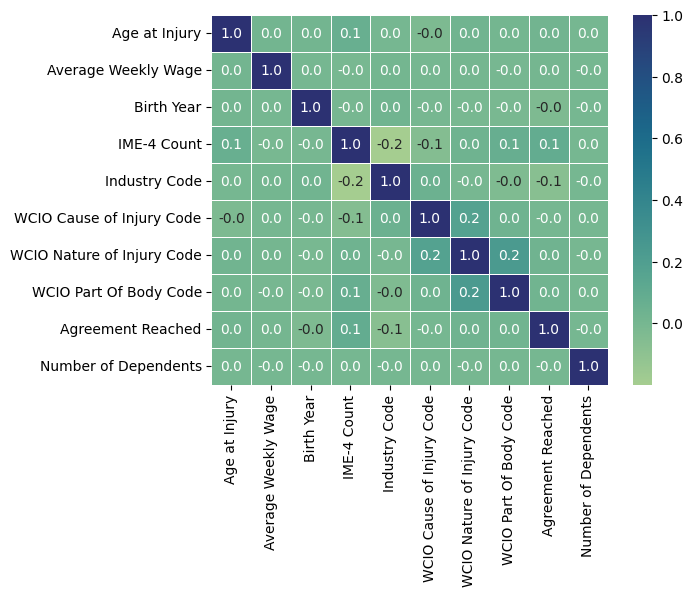

In [152]:
# Look for relationships between descriptive variables
correlation_matrix = df_descriptive_vars.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

### Categorical Variables

The next step involves exploring the categorical variables, mainly through visualization. The first step was to select the categorical variables.

In [153]:
# Select dates
cols_to_drop = df.columns[df.columns.str.contains('Date')]

# Create dataframe with categorical features only
categorical_df = df.loc[:,(df.dtypes == 'object') == True].drop(cols_to_drop, axis = 1)

Above, the categorical variables are selected by using the type of variables. Addicionally, variables with dates were removed beforehand because they are considered objects.

To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [154]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64
Missing values: 0

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64
Missing values: 0

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64
Missing values: 0

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL

In the output above, the unique values of the categorical features can be seen. Here are some conclusions about the categorical varaibles:
- *Alternative Dispute Resolution* has 5 rows with the value *U*.
- *Carrier Name* has several values with *STATE INSURANCE FUND* being the biggest group.
- *Claim Injury Type* is the target with 8 possible values, excluding the missing values which will be removed.
- * County of Injury

In [155]:
df[df['Alternative Dispute Resolution'] == 'U'].T

Claim Identifier,5582402,6032724,6034607,6108701,6108690
Accident Date,2018-03-12,2021-11-05,2022-07-06,2022-09-01,2022-08-29
Age at Injury,57.0,56.0,52.0,57.0,55.0
Alternative Dispute Resolution,U,U,U,U,U
Assembly Date,2020-10-21,2022-07-11,2022-07-13,2022-10-17,2022-10-17
Attorney/Representative,N,N,Y,N,N
Average Weekly Wage,0.0,0.0,0.0,NaN,0.0
Birth Year,1961.0,1965.0,1969.0,1965.0,1967.0
C-2 Date,NaN,NaN,NaN,NaN,NaN
C-3 Date,NaN,NaN,2023-03-09,NaN,NaN
Carrier Name,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS


In [156]:
# Things to do:

# Compare Carrier Name and Carrier Type
# Whats the difference between Gender = X or Gender = U

In [157]:
'''
Multiclass variable: Decision of the WCB relative to the claim:
“Accident” means that claim refers to workplace accident,
“Occupational Disease” means illness from the workplace. ->
requires WCB deliberation so it is unknown at start of claim.
'''
df['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values. With that in mind, several options were explored:
- One-hot encoding:
- Label encoding:
- Target encoding:


#### Number of injuries per county

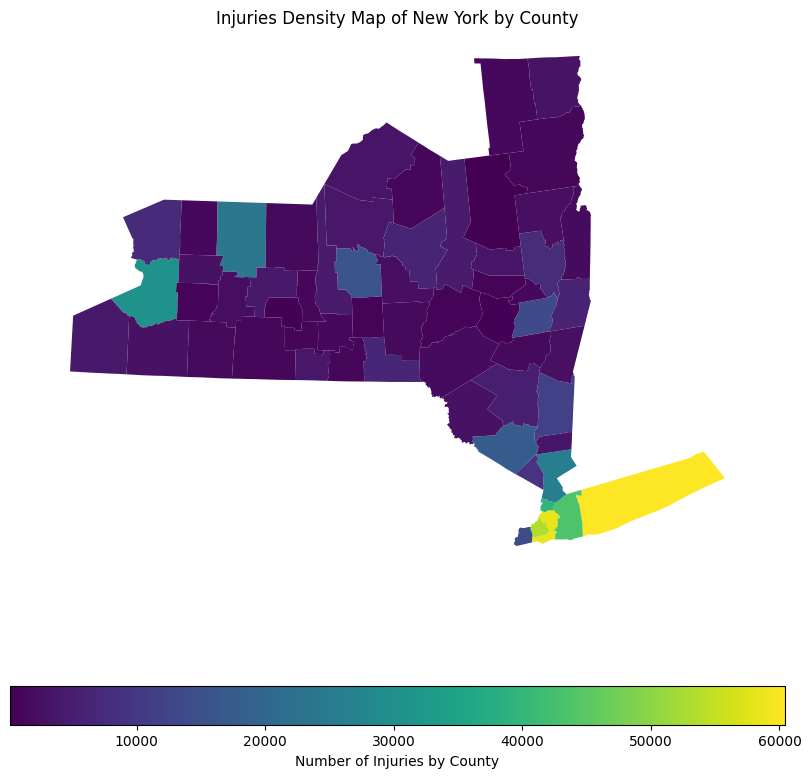

In [158]:
# Example usage:
plot_injuries_by_county(df)

# 3. Data Encoding

<a href="#top">Top &#129033;</a>

## Traget variable

As it is said in the metadata, the numbering indicated the severity. As such, ordinal mapping can be used, giving an order to the categories of the target variable.

In [159]:
# Define the ordinal mapping
ordinal_mapping = {
    '1. CANCELLED': 1,
    '2. NON-COMP': 2,
    '3. MED ONLY': 3,
    '4. TEMPORARY': 4,
    '5. PPD SCH LOSS': 5,
    '6. PPD NSL': 6,
    '7. PTD': 7,
    '8. DEATH': 8
}

In [160]:
# Map the categories to their ordinal values
df['Claim Injury Type Encoded'] = df['Claim Injury Type'].map(ordinal_mapping)

# Feature Selection

**Training Data Only**

### Chi-Squared Test

In [161]:
for var in categorical_df.columns:
    TestIndependence(df[var],df['Claim Injury Type'], var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
Claim Injury Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
WCB Decision is NOT an important predictor. (Discard WCB Decision from model)
